# Agendamento Inteligente com Algoritmo Genético

Protótipo para otimização de agendamentos em salões de beleza, clínicas e serviços baseados em horários.

## Objetivos
- Maximizar a ocupação dos profissionais.
- Minimizar horários ociosos e buracos na agenda.
- Sugerir melhores encaixes para novos clientes.
- Considerar restrições de horários, serviços, disponibilidade e preferências.
- Prototipação em Python/Jupyter Notebook.

## 1. Modelagem dos Dados

Definição das principais entidades do sistema:
- **Profissional**: nome, serviços oferecidos, horários disponíveis.
- **Serviço**: nome, duração, requisitos.
- **Cliente**: nome, preferências de horário/serviço.
- **Agendamento**: profissional, serviço, cliente, horário.

In [1]:
# Exemplo de modelagem de dados usando Python (dicionários e listas)
profissionais = [
    {"id": 1, "nome": "Ana", "servicos": [1, 2], "horarios": ["09:00", "10:00", "11:00", "14:00"]},
    {"id": 2, "nome": "Carlos", "servicos": [2, 3], "horarios": ["10:00", "11:00", "15:00"]}
]

servicos = [
    {"id": 1, "nome": "Corte de Cabelo", "duracao": 60},
    {"id": 2, "nome": "Manicure", "duracao": 45},
    {"id": 3, "nome": "Massagem", "duracao": 90}
]

clientes = [
    {"id": 1, "nome": "João", "preferencias": {"servico": 1, "horario": "09:00"}},
    {"id": 2, "nome": "Maria", "preferencias": {"servico": 2, "horario": "10:00"}}
]

agendamentos = []  # Lista de agendamentos realizados

## 2. Restrições e Preferências

- Horários de trabalho dos profissionais.
- Duração dos serviços.
- Disponibilidade dos profissionais.
- Preferências dos clientes (horário, profissional, serviço).
- Evitar sobreposição de agendamentos.

## 3. Esboço da Função de Fitness

A função de fitness será responsável por avaliar a qualidade de uma solução de agendamento.

**Critérios sugeridos:**
- Ocupação máxima dos profissionais.
- Menor quantidade de horários ociosos.
- Atendimento às preferências dos clientes.
- Respeito às restrições de horários e serviços.

Abaixo, um esboço da função de fitness (ainda sem implementação do algoritmo genético):

In [ ]:
def calcular_fitness(agendamentos, profissionais, clientes):
    '''
    Avalia a qualidade de uma solução de agendamento.
    Critérios: ocupação, ociosidade, preferências, restrições.
    '''
    fitness = 0
    # Exemplo de critérios (a serem detalhados):
    # - +1 ponto para cada agendamento realizado
    # - -1 ponto para cada horário ocioso
    # - +2 pontos se atender preferência do cliente
    # - Penalidade para sobreposição ou violação de restrições
    return fitness

## 4. Próximos Passos

- Refinar a modelagem dos dados conforme necessidades do negócio.
- Detalhar e implementar a função de fitness.
- Gerar exemplos de agendamentos para teste.
- Futuramente: implementar o algoritmo genético e expor via API.

In [2]:
# Exemplos de agendamentos fictícios
# Cada agendamento: profissional, serviço, cliente, horário
agendamentos_exemplo = [
    # Bom encaixe: Ana faz corte para João no horário preferido
    {"profissional": 1, "servico": 1, "cliente": 1, "horario": "09:00"},
    # Bom encaixe: Carlos faz manicure para Maria no horário preferido
    {"profissional": 2, "servico": 2, "cliente": 2, "horario": "10:00"},
    # Problema: Ana agendada para dois clientes no mesmo horário (conflito)
    {"profissional": 1, "servico": 2, "cliente": 2, "horario": "09:00"},
    # Problema: Carlos agendado para serviço que não oferece
    {"profissional": 2, "servico": 1, "cliente": 1, "horario": "11:00"},
    # Horário ocioso: Ana tem horário livre às 14:00
]

In [3]:
# Visualizar e explicar os exemplos de agendamentos
for i, ag in enumerate(agendamentos_exemplo, 1):
    print(f"Agendamento {i}: Profissional {ag['profissional']}, Serviço {ag['servico']}, Cliente {ag['cliente']}, Horário {ag['horario']}")
    if i == 1:
        print("  -> Bom encaixe: Ana faz corte para João no horário preferido.")
    elif i == 2:
        print("  -> Bom encaixe: Carlos faz manicure para Maria no horário preferido.")
    elif i == 3:
        print("  -> Problema: Ana agendada para dois clientes no mesmo horário (conflito).")
    elif i == 4:
        print("  -> Problema: Carlos agendado para serviço que não oferece.")
    elif i == 5:
        print("  -> Horário ocioso: Ana tem horário livre às 14:00.")

Agendamento 1: Profissional 1, Serviço 1, Cliente 1, Horário 09:00
  -> Bom encaixe: Ana faz corte para João no horário preferido.
Agendamento 2: Profissional 2, Serviço 2, Cliente 2, Horário 10:00
  -> Bom encaixe: Carlos faz manicure para Maria no horário preferido.
Agendamento 3: Profissional 1, Serviço 2, Cliente 2, Horário 09:00
  -> Problema: Ana agendada para dois clientes no mesmo horário (conflito).
Agendamento 4: Profissional 2, Serviço 1, Cliente 1, Horário 11:00
  -> Problema: Carlos agendado para serviço que não oferece.


## 5. Avaliando os exemplos com a função de fitness

Agora vamos usar a função de fitness para avaliar os exemplos de agendamento criados. O objetivo é entender, na prática, como cada critério influencia a pontuação final e como identificar pontos de melhoria na agenda.

In [ ]:
# Avaliar os exemplos de agendamento usando a função de fitness
pontuacao = calcular_fitness(agendamentos_exemplo, profissionais, clientes)
print(f"Pontuação da agenda (fitness): {pontuacao}")

# Lembre-se: a função de fitness ainda é um esboço e pode ser detalhada para refletir melhor os critérios do negócio.

### 6. Detalhando a função de fitness: Pontos por agendamento realizado

Vamos começar a detalhar a função de fitness. O primeiro critério será simples: cada agendamento realizado soma 1 ponto na pontuação final. Assim, quanto mais agendamentos válidos, maior a pontuação.

In [4]:
def calcular_fitness_simples(agendamentos, profissionais, clientes):
    """
    Função de fitness simples: soma 1 ponto para cada agendamento realizado.
    """
    return len(agendamentos)

# Testar a nova função de fitness simples
pontuacao_simples = calcular_fitness_simples(agendamentos_exemplo, profissionais, clientes)
print(f"Pontuação (apenas quantidade de agendamentos): {pontuacao_simples}")

Pontuação (apenas quantidade de agendamentos): 4


Vamos detalhar a função de fitness passo a passo. O primeiro critério é simples: cada agendamento realizado soma 1 ponto na pontuação final. Assim, quanto mais agendamentos, maior a pontuação.

In [10]:
def calcular_fitness_completo(agendamentos, profissionais, clientes):
    """
    Função de fitness completa para avaliação de agendamentos.
    Critérios:
    +1 ponto para cada agendamento realizado
    -2 pontos para cada conflito de horário (profissional duplamente agendado)
    -2 pontos para cada serviço não oferecido pelo profissional
    +2 pontos se o agendamento atender a preferência de horário do cliente
    -1 ponto para cada horário ocioso (profissional disponível sem agendamento)
    """
    fitness = 0
    conflitos = 0
    servico_invalido = 0
    preferencias_atendidas = 0
    horarios_ociosos = 0
    
    # Mapear horários ocupados por profissional
    horarios_prof = {p['id']: set() for p in profissionais}
    horarios_disponiveis = {p['id']: set(p['horarios']) for p in profissionais}
    
    for ag in agendamentos:
        fitness += 1  # ponto por agendamento
        prof = next((p for p in profissionais if p['id'] == ag['profissional']), None)
        cli = next((c for c in clientes if c['id'] == ag['cliente']), None)
        if prof is None or cli is None:
            continue
        # Conflito de horário
        if ag['horario'] in horarios_prof[prof['id']]:
            fitness -= 2
            conflitos += 1
        else:
            horarios_prof[prof['id']].add(ag['horario'])
        # Serviço não oferecido
        if ag['servico'] not in prof['servicos']:
            fitness -= 2
            servico_invalido += 1
        # Preferência atendida
        if cli['preferencias']['servico'] == ag['servico'] and cli['preferencias']['horario'] == ag['horario']:
            fitness += 2
            preferencias_atendidas += 1
        # Remover horário agendado dos disponíveis
        if ag['horario'] in horarios_disponiveis[prof['id']]:
            horarios_disponiveis[prof['id']].remove(ag['horario'])
    # Penalizar horários ociosos
    for prof_id, livres in horarios_disponiveis.items():
        horarios_ociosos += len(livres)
        fitness -= len(livres)
    # print(f"Conflitos de horário: {conflitos}")
    # print(f"Serviços não oferecidos: {servico_invalido}")
    # print(f"Preferências atendidas: {preferencias_atendidas}")
    # print(f"Horários ociosos: {horarios_ociosos}")
    return fitness

# Testar a função de fitness completa
pontuacao_completa = calcular_fitness_completo(agendamentos_exemplo, profissionais, clientes)
print(f"Pontuação final (fitness completa): {pontuacao_completa}")

Pontuação final (fitness completa): -12


## 7. Prototipando o Algoritmo Genético

Agora vamos criar uma massa maior de dados (mais clientes e preferências) e implementar um exemplo simples de algoritmo genético para buscar melhores agendas. O objetivo é mostrar o funcionamento básico: geração de populações, avaliação, seleção, cruzamento e mutação.

In [15]:
# Massa maior de dados para o algoritmo genético
import random

profissionais = [
    {"id": 1, "nome": "Ana", "servicos": [1, 2], "horarios": ["09:00", "10:00", "11:00", "14:00", "15:00"]},
    {"id": 2, "nome": "Carlos", "servicos": [2, 3], "horarios": ["09:00", "10:00", "11:00", "14:00", "15:00"]},
    {"id": 3, "nome": "Beatriz", "servicos": [1, 3], "horarios": ["09:00", "10:00", "11:00", "14:00", "15:00"]}
]

servicos = [
    {"id": 1, "nome": "Corte de Cabelo", "duracao": 60},
    {"id": 2, "nome": "Manicure", "duracao": 45},
    {"id": 3, "nome": "Massagem", "duracao": 90}
]

# Gerar 10 clientes fictícios com preferências aleatórias
horarios_possiveis = ["09:00", "10:00", "11:00", "14:00", "15:00"]
clientes = []
for i in range(1, 11):
    servico_pref = random.choice(servicos)["id"]
    horario_pref = random.choice(horarios_possiveis)
    clientes.append({
        "id": i,
        "nome": f"Cliente {i}",
        "preferencias": {"servico": servico_pref, "horario": horario_pref}
    })

In [16]:
# Algoritmo Genético otimizado para agendamentos com crossover robusto e registro da evolução do fitness
POP_SIZE = 20
N_GERACOES = 30
TAXA_MUTACAO = 0.2

def crossover_unico_por_cliente(pai1, pai2):
    filho = []
    for ag1 in pai1:
        cliente_id = ag1['cliente']
        ag2 = next((a for a in pai2 if a['cliente'] == cliente_id), ag1)
        filho.append(ag1 if random.random() < 0.5 else ag2)
    return filho

def gerar_individuo():
    individuo = []
    for cliente in clientes:
        prof = random.choice(profissionais)
        if cliente['preferencias']['servico'] in prof['servicos']:
            servico = cliente['preferencias']['servico']
        else:
            servico = random.choice(prof['servicos'])
        horario = random.choice(prof['horarios'])
        individuo.append({
            "profissional": prof['id'],
            "servico": servico,
            "cliente": cliente['id'],
            "horario": horario
        })
    return individuo

def mutacao(individuo):
    novo = []
    for ag in individuo:
        if random.random() < TAXA_MUTACAO:
            prof = random.choice(profissionais)
            servico = random.choice(prof['servicos'])
            horario = random.choice(prof['horarios'])
            novo.append({"profissional": prof['id'], "servico": servico, "cliente": ag['cliente'], "horario": horario})
        else:
            novo.append(ag)
    return novo

# Inicializar população
populacao = [gerar_individuo() for _ in range(POP_SIZE)]
evolucao_fitness = []

for geracao in range(N_GERACOES):
    fitness_pop = [calcular_fitness_completo(ind, profissionais, clientes) for ind in populacao]
    selecionados = [populacao[i] for i in sorted(range(len(fitness_pop)), key=lambda k: fitness_pop[k], reverse=True)[:POP_SIZE//2]]
    nova_pop = []
    while len(nova_pop) < POP_SIZE:
        pais = random.sample(selecionados, 2)
        filho = crossover_unico_por_cliente(pais[0], pais[1])
        filho = mutacao(filho)
        nova_pop.append(filho)
    populacao = nova_pop
    melhor_fitness = max(fitness_pop)
    evolucao_fitness.append(melhor_fitness)
    # print(f"Geração {geracao+1}: Melhor fitness = {melhor_fitness}")

# Exibir melhor solução encontrada
fitness_final = [calcular_fitness_completo(ind, profissionais, clientes) for ind in populacao]
melhor_idx = fitness_final.index(max(fitness_final))
melhor_agenda = populacao[melhor_idx]
print("\nMelhor agenda encontrada:")
for ag in melhor_agenda:
    print(ag)


Melhor agenda encontrada:
{'profissional': 2, 'servico': 2, 'cliente': 1, 'horario': '10:00'}
{'profissional': 1, 'servico': 2, 'cliente': 2, 'horario': '15:00'}
{'profissional': 3, 'servico': 1, 'cliente': 3, 'horario': '15:00'}
{'profissional': 1, 'servico': 1, 'cliente': 4, 'horario': '15:00'}
{'profissional': 1, 'servico': 1, 'cliente': 5, 'horario': '14:00'}
{'profissional': 1, 'servico': 2, 'cliente': 6, 'horario': '14:00'}
{'profissional': 3, 'servico': 1, 'cliente': 7, 'horario': '09:00'}
{'profissional': 2, 'servico': 2, 'cliente': 8, 'horario': '11:00'}
{'profissional': 3, 'servico': 3, 'cliente': 9, 'horario': '11:00'}
{'profissional': 2, 'servico': 3, 'cliente': 10, 'horario': '15:00'}


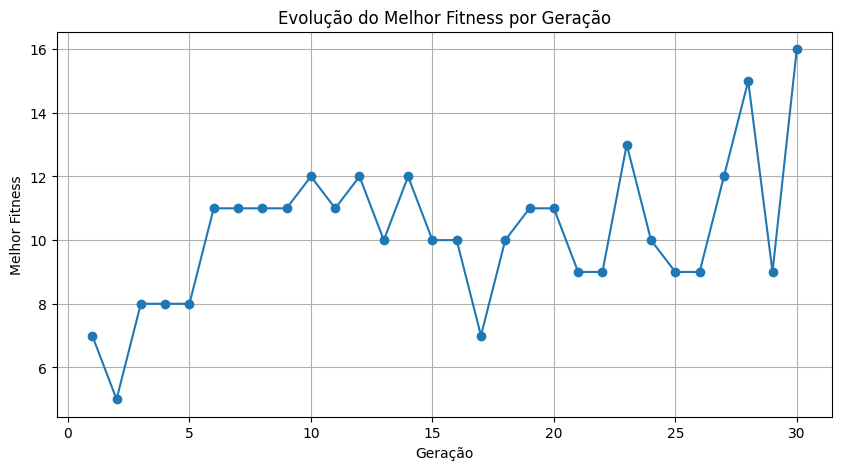

In [17]:
# Visualização da evolução do fitness ao longo das gerações
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(range(1, N_GERACOES+1), evolucao_fitness, marker='o')
plt.title('Evolução do Melhor Fitness por Geração')
plt.xlabel('Geração')
plt.ylabel('Melhor Fitness')
plt.grid(True)
plt.show()

### O que é um gene e como funciona o crossover neste contexto?

- **Gene:** No nosso caso, cada "gene" é um agendamento individual (um dicionário com profissional, serviço, cliente e horário).
- **Indivíduo:** Uma agenda completa, ou seja, uma lista de agendamentos (um para cada cliente).
- **Crossover:** Ao gerar um filho, pegamos parte dos agendamentos do pai1 e o restante do pai2. Por exemplo, se temos 10 clientes e o ponto de corte é 4, o filho terá os 4 primeiros agendamentos do pai1 e os 6 últimos do pai2.

#### Exemplo prático:

- **Pai 1:**
  - Cliente 1: Profissional 1, Serviço 1, Horário 09:00
  - Cliente 2: Profissional 2, Serviço 2, Horário 10:00
  - Cliente 3: Profissional 1, Serviço 2, Horário 11:00
  - Cliente 4: Profissional 3, Serviço 3, Horário 14:00
  - ...
- **Pai 2:**
  - Cliente 1: Profissional 2, Serviço 2, Horário 09:00
  - Cliente 2: Profissional 1, Serviço 1, Horário 10:00
  - Cliente 3: Profissional 3, Serviço 3, Horário 11:00
  - Cliente 4: Profissional 2, Serviço 2, Horário 14:00
  - ...
- **Ponto de corte:** 2
- **Filho gerado:**
  - Cliente 1: (do Pai 1)
  - Cliente 2: (do Pai 1)
  - Cliente 3: (do Pai 2)
  - Cliente 4: (do Pai 2)
  - ...

Assim, o filho mistura agendamentos dos dois pais, podendo herdar boas características de ambos.

In [ ]:
# Exemplo prático de crossover entre dois indivíduos (agendas)
exemplo_pai1 = [
    {"profissional": 1, "servico": 1, "cliente": 1, "horario": "09:00"},
    {"profissional": 2, "servico": 2, "cliente": 2, "horario": "10:00"},
    {"profissional": 1, "servico": 2, "cliente": 3, "horario": "11:00"},
    {"profissional": 3, "servico": 3, "cliente": 4, "horario": "14:00"}
]
exemplo_pai2 = [
    {"profissional": 2, "servico": 2, "cliente": 1, "horario": "09:00"},
    {"profissional": 1, "servico": 1, "cliente": 2, "horario": "10:00"},
    {"profissional": 3, "servico": 3, "cliente": 3, "horario": "11:00"},
    {"profissional": 2, "servico": 2, "cliente": 4, "horario": "14:00"}
]

ponto_corte = 2
filho = exemplo_pai1[:ponto_corte] + exemplo_pai2[ponto_corte:]

print("Pai 1:")
for ag in exemplo_pai1:
    print(ag)
print("\nPai 2:")
for ag in exemplo_pai2:
    print(ag)
print(f"\nPonto de corte: {ponto_corte}")
print("\nFilho gerado:")
for ag in filho:
    print(ag)

### Restrições de unicidade no crossover

No contexto do agendamento, cada cliente deve ter exatamente um agendamento na agenda (indivíduo). No crossover, é importante garantir que o filho não tenha dois agendamentos para o mesmo cliente.

Como garantir isso?
- O crossover deve montar o filho pegando, para cada cliente, o agendamento do pai1 ou do pai2, mas nunca duplicando clientes.
- Uma abordagem é, para cada posição (cliente), sortear de qual pai herdar aquele agendamento.

Vamos mostrar um exemplo de crossover corrigido para garantir unicidade.

In [13]:
# Crossover corrigido: cada cliente aparece só uma vez no filho
import random

def crossover_unico(pai1, pai2):
    filho = []
    for ag1, ag2 in zip(pai1, pai2):
        # Para cada cliente (posição), sorteia de qual pai herdar
        if random.random() < 0.5:
            filho.append(ag1)
        else:
            filho.append(ag2)
    return filho

# Exemplo prático
filho_unico = crossover_unico(exemplo_pai1, exemplo_pai2)
print("Filho gerado (unicidade garantida):")
for ag in filho_unico:
    print(ag)

NameError: name 'exemplo_pai1' is not defined

In [ ]:
# Crossover robusto: garante unicidade por cliente, mesmo com listas em ordens diferentes
def crossover_unico_por_cliente(pai1, pai2):
    filho = []
    for ag1 in pai1:
        cliente_id = ag1['cliente']
        # Busca o agendamento do mesmo cliente no pai2
        ag2 = next((a for a in pai2 if a['cliente'] == cliente_id), ag1)
        # Sorteia de qual pai herdar
        filho.append(ag1 if random.random() < 0.5 else ag2)
    return filho

# Exemplo prático (redefinindo os pais para garantir execução)
exemplo_pai1 = [
    {"profissional": 1, "servico": 1, "cliente": 1, "horario": "09:00"},
    {"profissional": 2, "servico": 2, "cliente": 2, "horario": "10:00"},
    {"profissional": 1, "servico": 2, "cliente": 3, "horario": "11:00"},
    {"profissional": 3, "servico": 3, "cliente": 4, "horario": "14:00"}
]
exemplo_pai2 = [
    {"profissional": 2, "servico": 2, "cliente": 1, "horario": "09:00"},
    {"profissional": 1, "servico": 1, "cliente": 2, "horario": "10:00"},
    {"profissional": 3, "servico": 3, "cliente": 3, "horario": "11:00"},
    {"profissional": 2, "servico": 2, "cliente": 4, "horario": "14:00"}
]

filho_unico = crossover_unico_por_cliente(exemplo_pai1, exemplo_pai2)
print("Filho gerado (unicidade garantida, robusto):")
for ag in filho_unico:
    print(ag)